# Project: Wrangling and Analyzing WeRateDogs twitter Data
### INTRODUCTION:
   WeRateDogs is a twitter account that offers professional dog ratings with humorous contents. The datasets to be used include the activities of the account from 2017 to 2019.
There are 3 datasets to be wrangled:
1. Twitter archive enhanced data which contains the twitter activities such as retweets, favorites, timestamp, source, etc
2. Image pred.tsv data which is a dataset containing prediction made using the images of the different dogs rated by the account. This was provided by Udacity
3. tweets.json file which contains further twitter activity



### OBJECTIVEs:
1. Gather the datasets from their sources using requests, pandas, etc
2. Read the datasets into a Pandas dataframe and save them  into csv files
3. Cleaning the datasets, using pandas, numpy
4. Performing Analysis using pandas, numpy and visualization libraries- Matplotlib and Seaborn

In [1]:
#importing packages

import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering

1. The Twitter archive data (twitter_archive_enhanced.csv) has been downloaded manually and will now be read into a Dataframe

In [2]:
#loading twitter_archive data as df_1
df_1= pd.read_csv('twitter-archive-enhanced.csv')
df_1= pd.DataFrame(df_1)
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Using the Requests library to download the tweet image prediction (image_predictions.tsv) and converting it to a CSV file

In [4]:
#using requests library to download the image predictions data 
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

open('image-pred.tsv', 'wb').write(r.content)


335079

In [5]:

tsv_file='image-pred.tsv'
 
# reading given tsv file
csv_table=pd.read_table(tsv_file,sep='\t')
 
# converting tsv file into csv
csv_table.to_csv('image-pred.csv',index=False)
 
# output
print("Successfully made csv file")

Successfully made csv file


In [6]:
#reading the image pred data as df_2
df_2= pd.read_csv('image-pred.csv')
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Due to inability to access the twitter API, the tweet_json was downloaded manually and is loaded below

In [7]:
df = pd.read_json('tweet_json.json', lines=True)
df.to_csv('tweets.csv', index = None)

In [8]:
#reading the tweets.csv data as df_3
df_3= pd.read_csv('tweets.csv')
df_3.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing Data

Assessing the tweet-archive-dataset named df_1

In [9]:
#getting the general overview of df_1
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
#getting random samples of the data
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
153,862457590147678208,NaN,NaN,2017-05-11 00:01:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jersey. He likes to watch movies, but ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/862457590...,13,10,Jersey,None,None,None,None
1376,701805642395348998,NaN,NaN,2016-02-22 16:27:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please pray for this pupper. Nothing wrong wit...,NaN,NaN,NaN,https://vine.co/v/ivV6Y37mH5Z,11,10,None,None,None,pupper,None
2092,670782429121134593,NaN,NaN,2015-11-29 01:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dude slaps your girl's ass what do you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670782429...,5,10,None,None,None,None,None
1914,674330906434379776,6.658147e+17,16374678.0,2015-12-08 20:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10\n@ABC7,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
533,807621403335917568,NaN,NaN,2016-12-10 16:22:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ollie Vue. He was a 3 legged pupper on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807621403...,14,10,Ollie,None,None,pupper,None


In [12]:
df_1.describe(include= 'all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2016-05-12 01:40:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,2017-01-04 01:05:59 +0000,https://twitter.com/dog_rates/status/740373189...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


In [13]:
df_1.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
#checking for duplicates
df_1.duplicated().sum()

0

In [15]:
#checking for null values
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
df_1['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
null_url= df_1[df_1['expanded_urls'].isnull()]
null_url

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


### Assessing the image pred data as df_2

In [18]:
#checking the first rows
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
#looking for random samples of the data 
df_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
139,668542336805281792,https://pbs.twimg.com/media/CUcjtL8WUAAAJoz.jpg,1,American_Staffordshire_terrier,0.267695,True,French_bulldog,0.254050,True,Staffordshire_bullterrier,0.212381,True
1973,869702957897576449,https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg,1,Pembroke,0.993449,True,Cardigan,0.006325,True,Chihuahua,0.000178,True
1220,743980027717509120,https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg,1,bull_mastiff,0.975730,True,Rhodesian_ridgeback,0.008073,True,pug,0.005571,True
1569,794355576146903043,https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg,1,cocker_spaniel,0.500509,True,golden_retriever,0.272734,True,jigsaw_puzzle,0.041476,False
518,676470639084101634,https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg,1,golden_retriever,0.790386,True,borzoi,0.022885,True,dingo,0.015343,False


In [20]:
#getting the general info of the dataset
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_2.describe(include= 'all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


In [22]:
#checking for duplicate values
df_2.duplicated().sum()

0

In [23]:
#checking for null values
df_2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

## Assessing the tweets dataset as df_3

In [24]:
df_3.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [25]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   int64  
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     float64
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     f

In [26]:
df_3.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [27]:
df_3.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [28]:
df_3.duplicated().sum()

0

### Quality issues
1. The irrelevant 00:00 at the end of the timestamp column

2. The timestamp column in df_1 is wrongly formatted i.e object instead of datetime

3. about 181 tweets in df_1 are retweets or replies to another tweets and thus should be removed

4. Retweeted and in reply to columns as well as their related columns are to be dropped

5. The created column in df_3 is not necessary since there is a timestamp column in df_1. Also the geo,user,coordinates, place, contributors are also irrelevant and mostly contain no values

6. The source column is also not useful for analysis and it doesn't provide any important information and will thus be dropped
7. The expanded URL column contains null values and can thus influence and cause incorrect observations. Also, it doesn't contribute significantly to the analysis

8. The possibly sensitive and possibly sensitive appealable columns only contains a single value type and are thus not useful for analysis

### Tidiness issues
1. The doggo, floofer, pupper, puppo should be in a single column as they all indicate the same observation which is dog stages
2. The details of a single tweet is contained in 3 different datasets

## Cleaning Data

In [29]:
# Making copies of original pieces of data
df_1_clean= df_1.copy()
df_2_clean=df_2.copy()
df_3_clean= df_3.copy()

### Issue #1:
The irrelevant 00:00 at the end of the timestamp column

#### Define
The 00:00 at the end of the timestamp column makes the values vague and does not haveany effect on the analysis. using the str.split function, this will be removed

#### Code

In [30]:
df_1_clean['timestamp']= df_1_clean['timestamp'].str.split('+', expand= True)

#### Test

In [31]:
df_1_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Issue #2

#### Define:
The timestamp column in df_1 is wrongly formatted i.e object instead of datetime

#### clean

In [32]:
df_1_clean['timestamp']= pd.to_datetime(df_1_clean['timestamp'])

#### Test

In [33]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Issue #3
about 181 tweets in df_1 are retweets or replies to another tweets and thus should be removed

#### Define
The analysis is aimed at only original tweets and so tweets that are replies or retweets are dropped using the df.drop method

code

In [34]:
df_1_clean.drop(df_1_clean[df_1_clean['retweeted_status_id'].notnull()].index, inplace=True)
df_1_clean.drop(df_1_clean[df_1_clean['in_reply_to_status_id'].notnull()].index, inplace=True)
df_3_clean.drop(df_3_clean[df_3_clean['retweeted_status'].notnull()].index, inplace=True)
df_3_clean.drop(df_3_clean[df_3_clean['in_reply_to_status_id'].notnull()].index, inplace=True)

test

In [35]:
df_1_clean['retweeted_status_id'].unique()

array([nan])

In [36]:
df_3_clean['retweeted_status'].unique()

array([nan], dtype=object)

In [37]:
df_1_clean.shape

(2097, 17)

In [38]:
df_3_clean.shape

(2097, 31)

In [39]:
df_1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #4
Some columns are not relevant for the analysis

### Define
using the pandas df.drop, i will drop the irrelevant columns

### Code

In [40]:
df_3_clean.drop (['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str',
                 'in_reply_to_screen_name','retweeted_status', 'quoted_status_id','id_str','source',
                 'quoted_status_id_str','quoted_status','extended_entities','entities'],axis=1, inplace=True)
df_1_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                 'retweeted_status_timestamp'],axis=1,inplace=True)

### Test

In [41]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


In [42]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2097 non-null   object 
 1   id                             2097 non-null   int64  
 2   full_text                      2097 non-null   object 
 3   truncated                      2097 non-null   bool   
 4   display_text_range             2097 non-null   object 
 5   user                           2097 non-null   object 
 6   geo                            0 non-null      float64
 7   coordinates                    0 non-null      float64
 8   place                          1 non-null      object 
 9   contributors                   0 non-null      float64
 10  is_quote_status                2097 non-null   bool   
 11  retweet_count                  2097 non-null   int64  
 12  favorite_count                 2097 non-null   i

### Issue #5
The created column in df_3 is not necessary since there is a timestamp column in df_1. Also the geo,user,coordinates, place, contributors are also irrelevant and mostly contain no values

### Define
Using df.drop method to remove the irrelevant columns


### Code

In [43]:
df_3_clean.drop(['created_at','user', 'coordinates','place','contributors',], axis=1, inplace=True)


In [44]:
df_3_clean.drop('geo',axis=1, inplace=True)

### Test

In [45]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             2097 non-null   int64  
 1   full_text                      2097 non-null   object 
 2   truncated                      2097 non-null   bool   
 3   display_text_range             2097 non-null   object 
 4   is_quote_status                2097 non-null   bool   
 5   retweet_count                  2097 non-null   int64  
 6   favorite_count                 2097 non-null   int64  
 7   favorited                      2097 non-null   bool   
 8   retweeted                      2097 non-null   bool   
 9   possibly_sensitive             2094 non-null   float64
 10  possibly_sensitive_appealable  2094 non-null   float64
 11  lang                           2097 non-null   object 
dtypes: bool(4), float64(2), int64(3), object(3)
memo

### Issue #6
The source column is also not useful for analysis and it doesn't provide any important information and will thus be dropped

### Define
Using the df.drop function to remove the source column

### Code

In [46]:
df_1_clean.drop('source', axis=1, inplace=True)

### Test

In [47]:
df_1_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Issue #7
The expanded URL column contains null values and can thus influence and cause incorrect observations. Also, it doesn't contribute significantly to the analysis

### Define
Using df.drop to remove the expanded urls column

### Code

In [48]:
df_1_clean.drop('expanded_urls', axis=1, inplace= True)



### Test

In [49]:
df_1_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


### Issue #8
The possibly sensitive and possibly sensitive appealable columns only contains a single values and are thus not useful for analysis

### Define
using df.drop to remove the  possibly sensitive and possibly sensitive appealable columns

### Code

In [50]:
df_3_clean.drop(['possibly_sensitive','possibly_sensitive_appealable'], axis=1, inplace=True)



### Test

In [51]:
df_3_clean.head(1)

,id,full_text,truncated,display_text_range,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]",False,8853,39467,False,False,en


### Issue #9
 The doggo, floofer, pupper, puppo should be in a single column as they all indicate the same observation

### Define
Using the melt function, the columns will be condensed

### Code

In [52]:
dog_stage=df_1_clean.melt(id_vars=['tweet_id'], value_vars=('doggo','floofer','pupper','puppo'),
                         var_name='dogs_col', value_name='dog_stage')

In [53]:
dog_stage= dog_stage[~dog_stage['dog_stage'].isna()].drop('dogs_col', axis=1)

In [54]:
dog_stage['dog_stage'].value_counts()

None       8041
pupper      230
doggo        83
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [55]:
dog_stage= dog_stage.drop_duplicates()
dog_stage.duplicated().sum()

0

In [56]:
#Using the df.drop method to drop the doggo, floofer, pupper and puppo columns
df_1_clean.drop(['doggo','floofer','puppo','pupper'], axis=1, inplace=True)

In [57]:
dog_stage.shape

(2444, 2)

In [58]:
dog_stage['dog_stage'].unique()

array(['None', 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [59]:
df_1_clean=pd.merge(df_1_clean,dog_stage, on='tweet_id', how='left')

### Test

### Issue #10
The details of a single tweet is contained in 3 different datasets

### Define
merging the 3 datasets to ensure the details of each individual tweet is in the same dataset

### Code

In [60]:
#renaming id column  in df_3_clean to ensure a uniform primary key
df_3_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [61]:
# merging df_1_clean and df_3_clean via the common key
twitter_archive_master=pd.merge(df_1_clean, df_3_clean, on='tweet_id')
twitter_archive_master.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,full_text,truncated,display_text_range,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]",False,8853,39467,False,False,en
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,This is Tilly. She's just checking pup on you....,False,"[0, 138]",False,6514,33819,False,False,en
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]",False,4328,25461,False,False,en
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]",False,8964,42908,False,False,en
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,This is Franklin. He would like you to stop ca...,False,"[0, 138]",False,9774,41048,False,False,en


In [62]:
#Merging the image_pred table to the twitter_archive_master table
twitter_archive_master=pd.merge(twitter_archive_master, df_2_clean, on='tweet_id')
twitter_archive_master.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,full_text,truncated,display_text_range,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]",...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,This is Tilly. She's just checking pup on you....,False,"[0, 138]",...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]",...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]",...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,This is Franklin. He would like you to stop ca...,False,"[0, 138]",...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Test

In [63]:
twitter_archive_master.shape

(2284, 27)

In [64]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 2283
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2284 non-null   int64         
 1   timestamp           2284 non-null   datetime64[ns]
 2   text                2284 non-null   object        
 3   rating_numerator    2284 non-null   int64         
 4   rating_denominator  2284 non-null   int64         
 5   name                2284 non-null   object        
 6   dog_stage           2284 non-null   object        
 7   full_text           2284 non-null   object        
 8   truncated           2284 non-null   bool          
 9   display_text_range  2284 non-null   object        
 10  is_quote_status     2284 non-null   bool          
 11  retweet_count       2284 non-null   int64         
 12  favorite_count      2284 non-null   int64         
 13  favorited           2284 non-null   bool        

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, I will analyze and visualize the wrangled data.

In [66]:
#Loading the master dataset
df= pd.read_csv('twitter_archive_master.csv')
df.head(3)

,Unnamed: 0,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,full_text,truncated,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,This is Phineas. He's a mystical boy. Only eve...,False,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,This is Tilly. She's just checking pup on you....,False,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,This is Archie. He is a rare Norwegian Pouncin...,False,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [68]:
# dropping irrelevant columns that was added during merging as well as the repeated text column
df.drop(['Unnamed: 0','text'], axis=1, inplace=True)

In [69]:
#converting the timestamp column to dtetime format
df['timestamp']= pd.to_datetime(df['timestamp'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2284 non-null   int64         
 1   timestamp           2284 non-null   datetime64[ns]
 2   rating_numerator    2284 non-null   int64         
 3   rating_denominator  2284 non-null   int64         
 4   name                2284 non-null   object        
 5   dog_stage           2284 non-null   object        
 6   full_text           2284 non-null   object        
 7   truncated           2284 non-null   bool          
 8   display_text_range  2284 non-null   object        
 9   is_quote_status     2284 non-null   bool          
 10  retweet_count       2284 non-null   int64         
 11  favorite_count      2284 non-null   int64         
 12  favorited           2284 non-null   bool          
 13  retweeted           2284 non-null   bool        

## Analysis
* Analysis 1: What is the most commonly predicted dog type in the p1 category?
* Analysis 2: Does rating numerator affect number of favorites?
* Analysis 3: Which tweet has the most likes and retweets combined?

### Analysis 1: What is the most commonly predicted dog type in the p1 category?

In [71]:
df['p1'].value_counts()

golden_retriever      173
Labrador_retriever    109
Pembroke              101
Chihuahua              85
pug                    62
                     ... 
basketball              1
toilet_seat             1
fire_engine             1
bonnet                  1
zebra                   1
Name: p1, Length: 373, dtype: int64

### Analysis 2: Does rating numerator affect number of favorites?

In [72]:

df.groupby('rating_numerator')['favorite_count'].mean().sort_values(ascending=False)

rating_numerator
14      30534.062500
0       24574.000000
13      23886.266667
75      20296.000000
84      13518.000000
12      11407.906310
420      7989.000000
27       7320.000000
11       6962.567100
24       5927.000000
1        5599.800000
1776     5569.000000
165      5316.000000
121      4225.000000
204      4196.000000
10       4116.164211
5        3954.638889
44       3748.000000
7        3561.950000
144      3323.000000
60       3201.000000
99       3062.000000
88       2927.000000
4        2842.937500
8        2767.700000
6        2674.090909
45       2634.000000
50       2574.000000
9        2567.514970
3        2554.000000
80       2529.000000
2        2256.777778
26       1879.000000
Name: favorite_count, dtype: float64

### Analysis 3: Which tweet has the most likes and retweets combined?

In [73]:
df.groupby('full_text')[['tweet_id','favorite_count','retweet_count']].mean().sort_values(by=['retweet_count','favorite_count'],ascending=False).head(3)

,tweet_id,favorite_count,retweet_count
full_text,,,
Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,744234799360020480,131075,79515
This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,807106840509214720,107015,56625
Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,739238157791694848,75163,52360


### Insights:
1. The golden retrieval is the most commonly predicted dog in the p1 category 

2. Number of ratings has no significant effect on number of favorites of a tweet

3. The tweet with the most likes and retweets count was the tweet with tweet id: 744234799360020480 and the full text is: Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)

### Visualization

### Analysis 4: What is the relationship between the number of favorites and retweets?

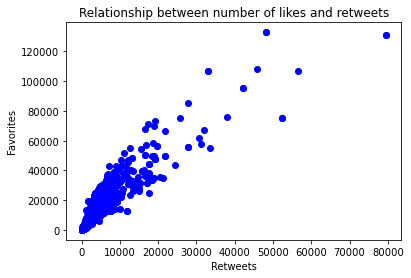

In [74]:
plt.scatter(df['retweet_count'], df['favorite_count'], color='b')
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.title('Relationship between number of likes and retweets');

### Insight:
* Number of favorites increase with number of retweets